In [1]:
from har_datasets.dataset.har_dataset import HARDataset
from har_datasets.parsers.supported import DatasetId, get_har_dataset_cfg_and_parser

cfg, parse = get_har_dataset_cfg_and_parser(DatasetId.UCI_HAR)
dataset = HARDataset(cfg, parse, override_csv=False)

train_loader, test_loader, val_loader = dataset.get_dataloaders()

1. loading dataframe...
2. checking format...
3. resample for equidistant sampling...
3. applying selections...
4. applying resampling...
4. applying normalizations...
5. generating windows...


100%|██████████| 400/400 [00:01<00:00, 283.09it/s]

6. applying per sample normalizations...
7. splitting into train, test and val...
7. done


In [2]:
dataset.window_index
dataset.windows[0]

,total_acc_x,total_acc_y,total_acc_z,body_acc_x,body_acc_y,body_acc_z,body_gyro_x,body_gyro_y,body_gyro_z
0,1.012817,-0.123217,0.102934,0.000181,0.010767,0.055561,0.030191,0.066014,0.022859
1,1.022833,-0.126876,0.105687,0.010139,0.006579,0.055125,0.043711,0.042699,0.010316
2,1.022028,-0.124004,0.102102,0.009276,0.008929,0.048405,0.035688,0.074850,0.013250
3,1.017877,-0.124928,0.106553,0.005066,0.007489,0.049775,0.040402,0.057320,0.017751
4,1.023680,-0.125767,0.102814,0.010810,0.006141,0.043013,0.047097,0.052343,0.002553
...,...,...,...,...,...,...,...,...,...
123,1.019815,-0.127010,0.094843,0.000228,-0.002929,-0.003412,0.025197,-0.005166,0.007355
124,1.019290,-0.126185,0.098350,-0.000300,-0.002023,0.000359,0.032328,-0.001298,0.002669
125,1.018445,-0.124070,0.100385,-0.001147,0.000171,0.002648,0.039852,0.001909,-0.002170
126,1.019372,-0.122745,0.099874,-0.000222,0.001574,0.002381,0.037449,-0.000080,-0.005643


torch.Size([32, 128, 9])


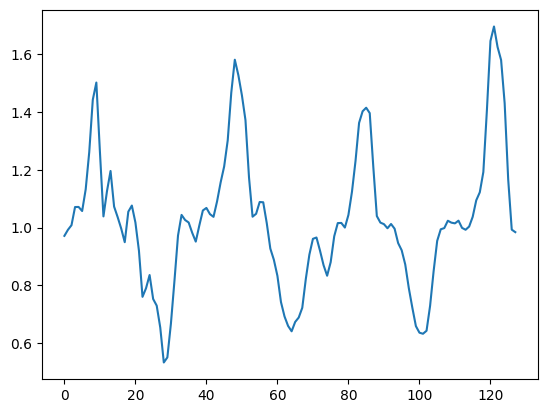

In [17]:
from matplotlib import pyplot as plt

y, x1, x2 = next(iter(train_loader))
print(x1.shape)

plt.plot(x1[0, :, 0])
plt.show()